Steps Involved


*   Improting of data and packages 
*   process the data and analysis the data
*   data split
*   Random forest model
*   Evalution and observation








In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest,RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor,KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.svm import OneClassSVM, SVC
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
LABELS = ["Non_Fraud", "Fraud"]

Load the data and then view it

In [ ]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49605,44132,-1.211298,-0.450385,1.440502,0.354908,-0.408886,1.636777,-0.951234,1.185703,-1.020024,0.018355,-0.587178,-0.866747,-1.747696,0.567664,1.742204,-2.860311,1.688666,0.069467,-1.850124,-0.482614,0.086607,0.526001,0.191522,-1.026321,-0.529712,-0.057442,0.125643,0.000680,79.00,0.0
49606,44132,1.176642,0.154754,0.246080,0.800814,-0.590838,-1.487705,0.336949,-0.316725,-0.047056,-0.016605,0.054961,0.031929,-0.694576,0.583059,0.827141,-0.120391,-0.055923,-0.574197,-0.319816,-0.097330,-0.008572,-0.105115,-0.017629,0.937907,0.463495,0.332980,-0.062039,0.016149,40.00,0.0
49607,44133,-1.103844,0.186527,1.568397,1.307678,0.316942,0.290415,1.147621,-0.222930,0.000022,0.766243,1.404012,0.478196,-0.729891,-0.194759,-0.317781,-1.183313,0.231183,-0.235281,0.959658,0.301536,-0.160645,0.468407,0.389831,0.213000,-0.015877,-0.278962,0.322504,-0.270168,108.00,0.0
49608,44134,-0.262018,0.851831,1.459865,1.057694,-0.725526,0.274325,1.750817,-1.097029,0.439934,0.944785,-0.226615,0.112300,0.622952,-1.030192,0.559891,-1.240474,0.209485,-0.556710,1.959963,0.086279,-0.272138,0.032569,-0.141121,0.476174,-0.587678,0.288669,-0.914934,-0.676786,172.82,0.0


Now, you can use head to view prticular amount of data from the starting.

In [ ]:
data = pd.read_csv('creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


To get info about the data about the count Dtype etc

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49610 entries, 0 to 49609
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    49610 non-null  int64  
 1   V1      49610 non-null  float64
 2   V2      49610 non-null  float64
 3   V3      49610 non-null  float64
 4   V4      49609 non-null  float64
 5   V5      49609 non-null  float64
 6   V6      49609 non-null  float64
 7   V7      49609 non-null  float64
 8   V8      49609 non-null  float64
 9   V9      49609 non-null  float64
 10  V10     49609 non-null  float64
 11  V11     49609 non-null  float64
 12  V12     49609 non-null  float64
 13  V13     49609 non-null  float64
 14  V14     49609 non-null  float64
 15  V15     49609 non-null  float64
 16  V16     49609 non-null  float64
 17  V17     49609 non-null  float64
 18  V18     49609 non-null  float64
 19  V19     49609 non-null  float64
 20  V20     49609 non-null  float64
 21  V21     49609 non-null  float64
 22

To describe the other qulitative values like mean, std, count we use .describe()

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,49610.000000,49610.000000,49610.000000,49610.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000
mean,28803.556239,-0.242569,0.012235,0.693009,0.185186,-0.257016,0.104114,-0.120255,0.053442,0.123490,-0.056611,0.370795,-0.344280,0.163091,0.168182,0.121488,-0.014642,0.116151,-0.094888,-0.028016,0.047379,-0.028396,-0.107154,-0.040123,0.007997,0.135954,0.020813,0.004792,0.004533,93.120688,0.002983
std,13097.468525,1.885867,1.630704,1.510559,1.400175,1.413057,1.310705,1.283507,1.224245,1.213441,1.145490,1.121682,1.339891,1.120223,1.128656,0.950374,0.953344,1.114627,0.874064,0.820387,0.725997,0.736050,0.637733,0.590810,0.594121,0.439067,0.501438,0.388364,0.333225,253.265971,0.054539
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,-18.271168,-4.049895,-17.769143,-3.844974,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-4.932733,-13.694584,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,21734.250000,-0.992845,-0.562967,0.217605,-0.720957,-0.866471,-0.635669,-0.605928,-0.146749,-0.611499,-0.532756,-0.440313,-0.956230,-0.585946,-0.296774,-0.438531,-0.499082,-0.358917,-0.570672,-0.523949,-0.165569,-0.231664,-0.529531,-0.179110,-0.322243,-0.127983,-0.330532,-0.063339,-0.006675,7.610000,0.000000
50%,33390.000000,-0.247223,0.079282,0.797007,0.190288,-0.287810,-0.150940,-0.076595,0.058406,0.012150,-0.112556,0.332061,-0.030818,0.107226,0.149295,0.236409,0.054590,0.066106,-0.077669,-0.031908,-0.022717,-0.068396,-0.082137,-0.051560,0.061999,0.175766,-0.071826,0.008986,0.022155,25.000000,0.000000
75%,38852.750000,1.155638,0.732318,1.431013,1.067346,0.283513,0.493918,0.424969,0.331555,0.819242,0.411827,1.167244,0.538411,0.876799,0.672175,0.799652,0.549965,0.540445,0.402244,0.479752,0.171717,0.108082,0.307262,0.078474,0.401392,0.421960,0.300180,0.083910,0.076342,85.000000,0.000000
max,44135.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,12.018913,4.846452,4.465413,7.692209,5.784514,6.098529,9.253526,4.295648,5.228342,26.237391,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [ ]:
data.describe

<bound method NDFrame.describe of         Time        V1        V2        V3  ...       V27       V28  Amount  Class
0          0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62    0.0
1          0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69    0.0
2          1 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66    0.0
3          1 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50    0.0
4          2 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99    0.0
...      ...       ...       ...       ...  ...       ...       ...     ...    ...
49605  44132 -1.211298 -0.450385  1.440502  ...  0.125643  0.000680   79.00    0.0
49606  44132  1.176642  0.154754  0.246080  ... -0.062039  0.016149   40.00    0.0
49607  44133 -1.103844  0.186527  1.568397  ...  0.322504 -0.270168  108.00    0.0
49608  44134 -0.262018  0.851831  1.459865  ... -0.914934 -0.676786  172.82    0.0
49609  44135 -4.719790 -4.249875  1.850000  ...      

To separate out the fraud, non fraud, percentage of fraud we do this step and get to know that only 0.3% of cases are fraud cases

In [ ]:
cases = len(data)
nonfraud_count = len(data[data.Class == 0])
fraud_count = len(data[data.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)
print('Case Analysis')
print('Total number of cases:- {}'.format(cases))
print('Total number of Non-fraud cases:- {}'.format(nonfraud_count))
print('Total number of fraud cases:- {}'.format(fraud_count))
print('Percentage of fraud cases:- {}'.format(fraud_percentage))

Case Analysis
Total number of cases:- 49610
Total number of Non-fraud cases:- 49461
Total number of fraud cases:- 148
Percentage of fraud cases:- 0.3


To check the null value in data

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isnull().sum().max()

1

To represent the fraud and non fraud cases on a graph


Text(0, 0.5, 'Frequency')

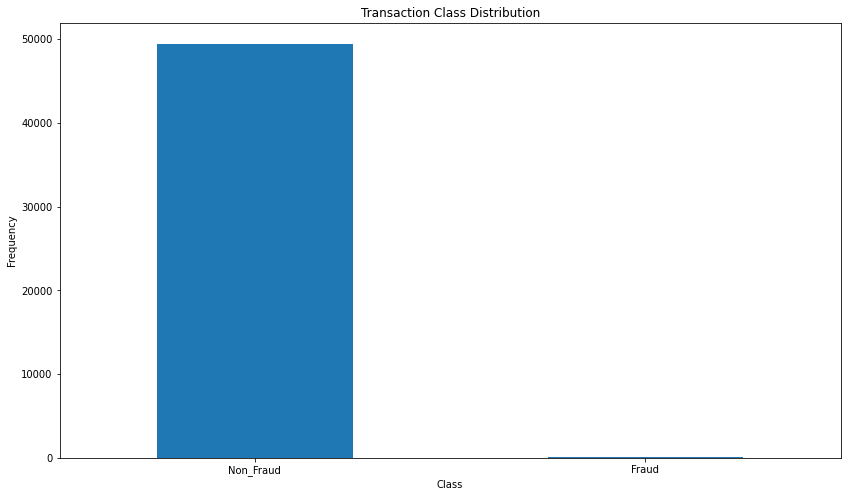

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

To decsribe the fraud data about its count, mean, std etc 

In [ ]:
fraud = data[data['Class']==1]
fraud.Amount.describe()

count     148.000000
mean      100.170676
std       233.347471
min         0.000000
25%         1.000000
50%         9.560000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

To decsribe the non fraud data about its count, mean, std etc 

In [ ]:
non_fraud = data[data['Class']==0]
non_fraud.Amount.describe()

count    49461.000000
mean        93.099593
std        253.325102
min          0.000000
25%          7.680000
50%         25.000000
75%         85.000000
max      12910.930000
Name: Amount, dtype: float64

As we can see value of amount variable incresing tremendously when comared to rest of the varaiable so to reduce the wide range we normalize it by StandardScaler.

In [ ]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1,1))
print(data['Amount'])

0        0.223085
1       -0.357062
2        1.127440
3        0.119951
4       -0.091331
           ...   
49605   -0.055755
49606   -0.209745
49607    0.058750
49608    0.314689
49609         NaN
Name: Amount, Length: 49610, dtype: float64


This again a representation of fraud and non fraud cases on histogram

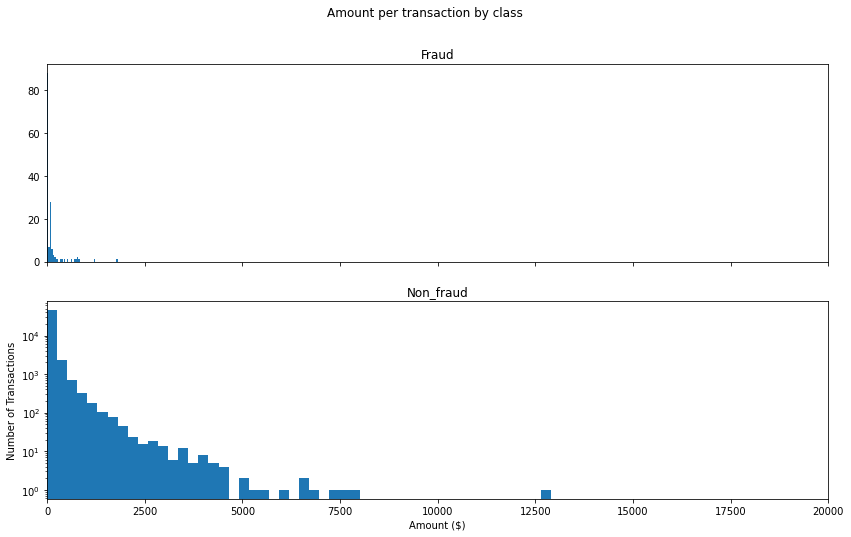

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(non_fraud.Amount, bins = bins)
ax2.set_title('Non_fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

This is a co-relation graph

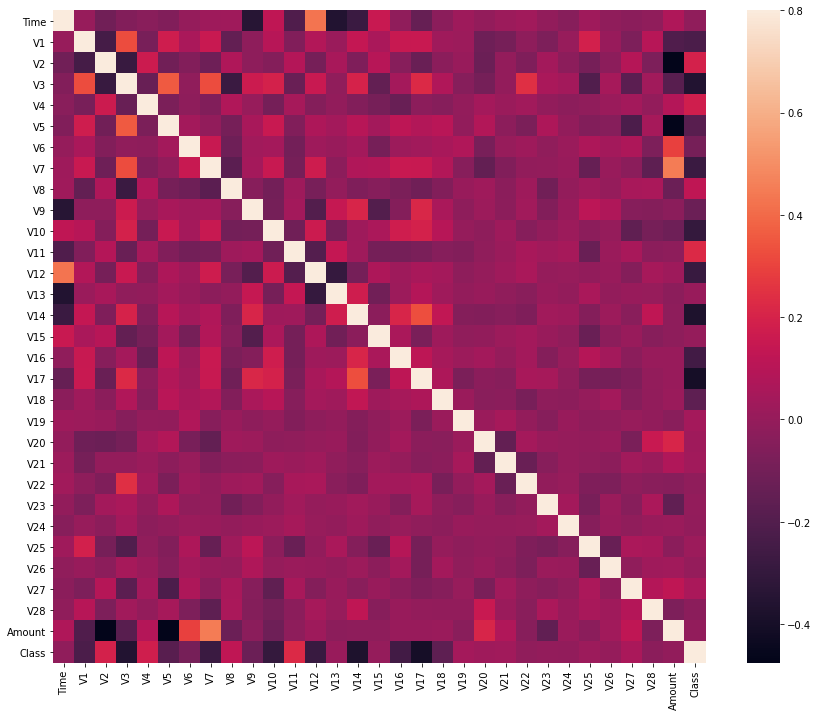

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (15, 12))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Now, Data selection and Data spliting
we are going to define the independent (X) and the dependent variables (Y). Using the defined variables, we will split the data into a training set and testing set which is further used for modeling and evaluating. We can split the data easily using the ‘train_test_split’ algorithm in python.

In [ ]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

(4961, 30)
(4961,)


In [ ]:



xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

Random forest model
Random forest model which we built using the ‘RandomForestClassifier’ algorithm and fitting and storing the values into the ‘yPred’. The random forest uses randomly selected features to construct multiple models. That’s the reason why the random forest model is used versus a decision tree.

Accuracy score
Accuracy score is one of the most basic evaluation metrics which is widely used to evaluate classification models. The accuracy score is calculated simply by dividing the number of correct predictions made by the model by the total number of predictions made by the model (can be multiplied by 100 to transform the result into a percentage). It can generally be expressed as:
Accuracy score = No.of correct predictions / Total no.of predictions

 F1 Score
The F1 score or F-score is one of the most popular evaluation metrics used for evaluating classification models. It can be simply defined as the harmonic mean of the model’s precision and recall. It is calculated by dividing the product of the model’s precision and recall by the value obtained on adding the model’s precision and recall and finally multiplying the result with 2. It can be expressed as:
F1 score = 2( (precision * recall) / (precision + recall) )

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
  
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))
  

  
f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))
  


The model used is Random Forest classifier
The accuracy is 0.998992950654582
The F1-Score is 0.8


If we look at the results of Random forest classifier then we get to know that w we get a accuracy of 99% which is a very good score and also we get F1 score as 80% that is also a very good score give us aoptimal result.


Confusion Matrix

Typically, a confusion matrix is a visualization of a classification model that shows how well the model has predicted the outcomes when compared to the original ones. Usually, the predicted outcomes are stored in a variable that is then converted into a correlation table. Using the correlation table, the confusion matrix is plotted in the form of a heatmap. Even though there are several built-in methods to visualize a confusion matrix, we are going to define and visualize it from scratch for better understanding. Let’s do it in python!

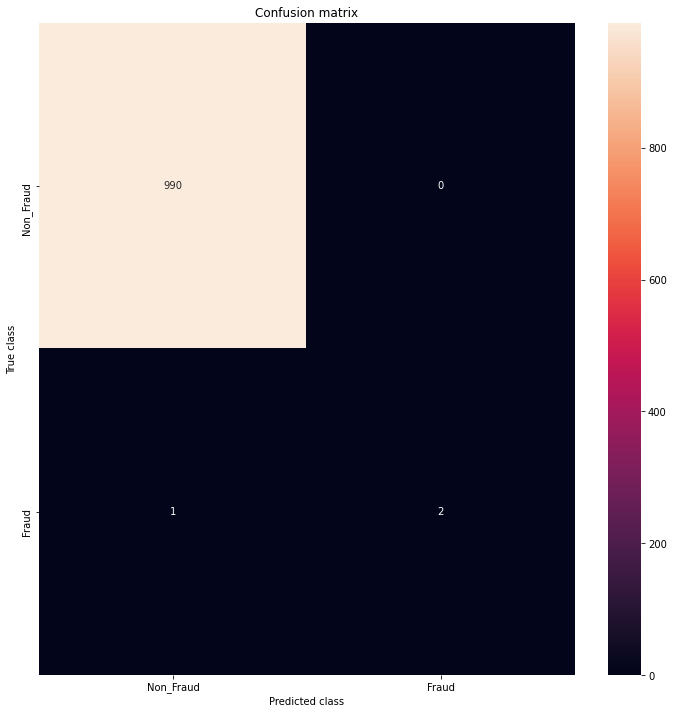

In [ ]:
LABELS = ['Non_Fraud', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

LOgistic Regresssion model
 
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression ).

In [ ]:
model = LogisticRegression()

In [ ]:
model = LogisticRegression()
model.fit(xTrain, yTrain)
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = model.predict(xTest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
X_train_prediction = model.predict(xTrain)
training_data_accuracy = accuracy_score(X_train_prediction, yTrain)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9977318548387096


In [ ]:
X_test_prediction = model.predict(xTest)
test_data_accuracy = accuracy_score(X_test_prediction, yTest)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9959718026183283


Again we get a good accuracy as 99.5% but still it is having less accuracy than Random Forest model

In [ ]:

from sklearn.metrics import f1_score
f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

The F1-Score is 0.3333333333333333


It F1 score is very less as comapred to Random forest model
